<a href="https://colab.research.google.com/github/jamleston/telecom-project/blob/main/model_GB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Model selection: Gradient Boosting***

 • Gradient Boosting is a powerful algorithm that optimizes the model step by step by minimizing errors. It is suitable for both classification and regression tasks and performs well even with small datasets.

 • Gradient Boosting works effectively for classification tasks on tabular data, especially when capturing feature interactions is important. However, it requires careful tuning of hyperparameters for optimal performance.

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
uploaded = files.upload()

In [3]:
df = pd.read_csv('preprocessed_dataset.csv')

In [3]:
X = df.drop(columns=['churn'])
y = df['churn']

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,test_size=0.5, random_state=42, stratify=y_temp)

In [5]:
gb = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators' : [100, 200],
    'learning_rate' : [0.01, 0.1, 0.2],
    'max_depth' : [3, 5, 10],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [1, 2]
}

grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [8]:
best_gb = grid_search.best_estimator_

In [9]:
y_pred = best_gb.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      3119
           1       0.86      0.83      0.85      4120

    accuracy                           0.83      7239
   macro avg       0.83      0.83      0.83      7239
weighted avg       0.83      0.83      0.83      7239



In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = best_gb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.83
Precision: 0.86
Recall: 0.83
F1 Score: 0.85


In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[2584  535]
 [ 705 3415]]


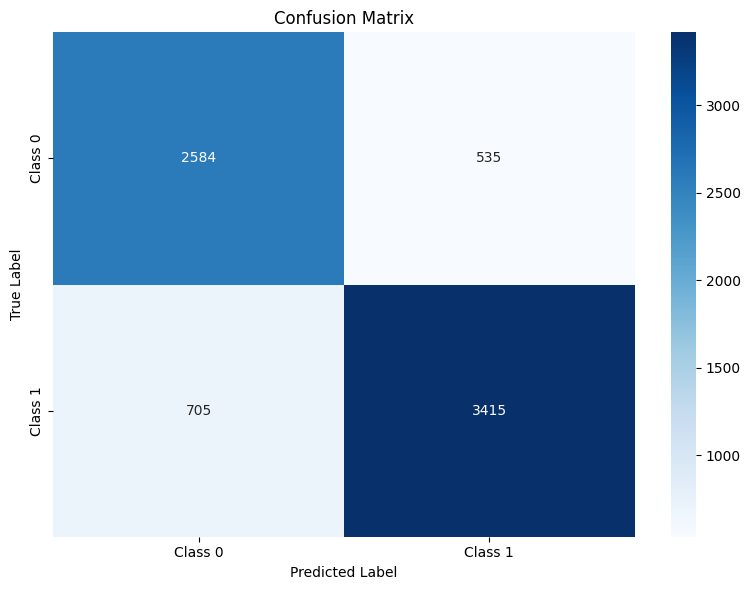

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

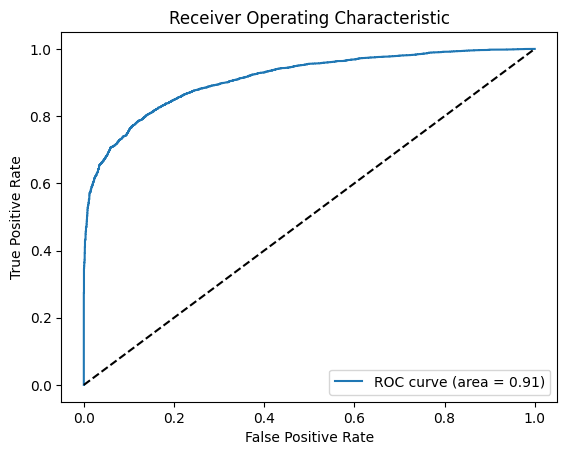

In [13]:
y_prob = best_gb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

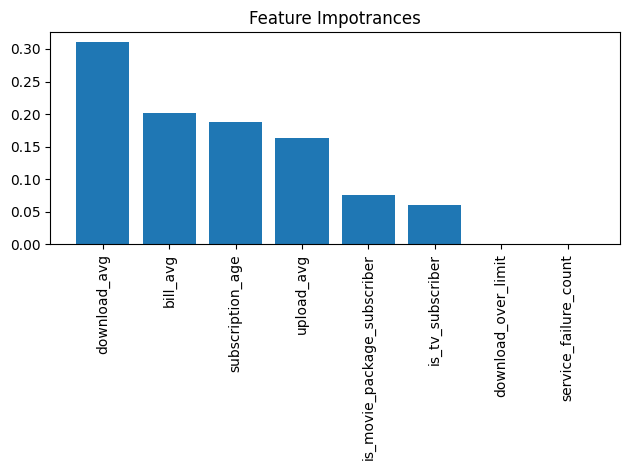

In [14]:
importances = best_gb.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure()
plt.title("Feature Impotrances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

Based on the analysis of the results, the Gradient Boosting model demonstrated strong performance on the test dataset, supported by the following key metrics:
 1. Classification Report:
 • Precision: The model achieved an average precision of 0.83. This means that 83% of all predicted positives are indeed correct. Precision for class 0 is 0.79, while for class 1, it is 0.86, indicating slightly better performance in correctly predicting class 1 samples.
 • Recall: Recall also stands at 0.83, reflecting the model’s ability to correctly identify 83% of all actual positive cases. For class 0, recall is 0.83, and for class 1, it is 0.83, indicating consistent performance in detecting examples from both classes.
 • F1-Score: The average F1-Score is 0.83, representing a solid balance between precision and recall. This metric confirms the model’s reliability in handling both classes effectively.
 2. Confusion Matrix:
 • The model correctly classified 2584 examples of class 0 out of 3119 possible, and 3415 examples of class 1 out of 4120 possible. This shows strong class separation capabilities.
 • False positives account for 535 cases, and false negatives are 705. These values are relatively low, reflecting the model’s stable performance.
 3. ROC Curve and AUC:
 • The ROC curve demonstrates a high area under the curve (AUC = 0.91). This metric highlights the model’s ability to distinguish between positive and negative classes effectively. An AUC of 0.91 means that the model correctly differentiates classes in 91% of cases, which is an excellent result.
 4. Overall Insights:
 • The model performs effectively on the test set, showing a good balance between precision and recall across both classes. The high AUC further supports its ability to classify data correctly, even in challenging scenarios.
 • Gradient Boosting excels in tasks that require distinguishing complex patterns in data. Its advantage lies in using a powerful ensemble approach that combines multiple weak learners to achieve high performance.

In conclusion, the Gradient Boosting model is one of the best choices for this classification task. It is well-suited for real-world applications where precision and reliability are essential.